In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value
from sklearn.tree import DecisionTreeClassifier #to build classification tree
from sklearn.tree import plot_tree #to draw c.tree
from sklearn.model_selection import train_test_split #to split data train and test
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [4]:
df = pd.read_csv(r"C:\Users\SHELY MULIAWATI\Downloads\processed.cleveland.data", header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','examp','oldpeak','sloge','ca','thal','hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examp,oldpeak,sloge,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [8]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [9]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [10]:
len(df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')])

6

In [11]:
df.loc[(df['ca']=='?')
          |
          (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examp,oldpeak,sloge,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
len(df)

303

In [15]:
df_no_missing = df.loc[(df['ca'] != '?')
                      &
                      (df['thal'] != '?')]

In [16]:
len(df_no_missing)

297

In [17]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [18]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [19]:
X = df_no_missing.drop("hd",axis=1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,examp,oldpeak,sloge,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [21]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [23]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,examp,oldpeak,sloge,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [25]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg','sloge','thal'])

In [26]:
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,examp,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,sloge_1.0,sloge_2.0,sloge_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [27]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [30]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1], dtype=int64)

In [51]:
#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=0)
#create dec.tree and fit into training data
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt = clf_dt.fit(X_train, y_train)

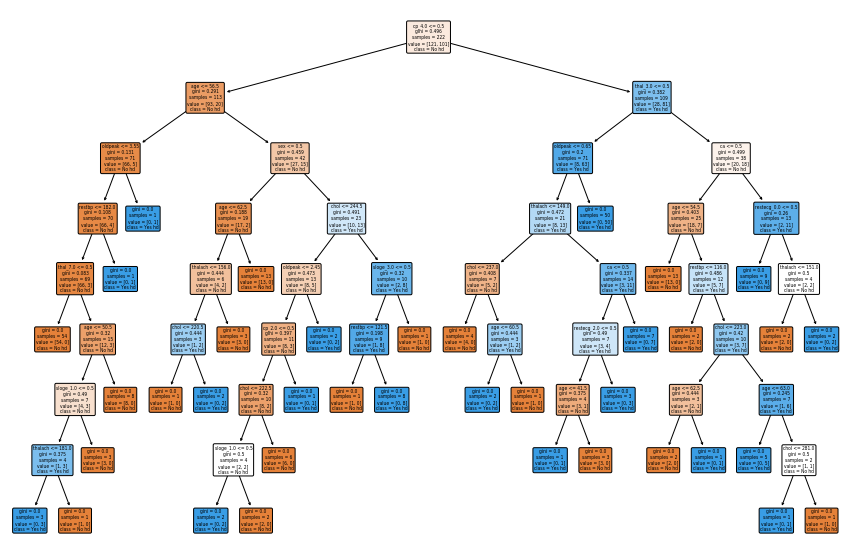

In [52]:
plt.figure(figsize=(15,10))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['No hd','Yes hd'],
         feature_names=X_encoded.columns);

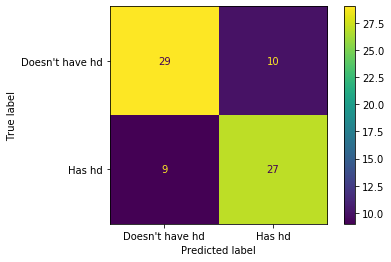

In [53]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Doesn't have hd","Has hd"])

In [50]:
#UNTUK PRUNING GANTI2 RANGE MAXDEPTH AJA LALU COBA RUN ULANG DTREE CLASSIFIERnya
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf_dt = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf_dt.fit(X_train, y_train)
    score = clf_dt.score(X_test, y_test)
    accuracy.append(score)

In [54]:
from sklearn.metrics import classification_report, accuracy_score
predictions = clf_dt.predict(X_test)
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        39
           1       0.73      0.75      0.74        36

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75

0.7466666666666667


TypeError: 'DecisionTreeClassifier' object is not callable